## Importing Libraries

In [3]:
%run libraries.ipynb

## Importing Files

In [4]:
%run all_functions.ipynb

## Reading the Image

In [5]:
image = imread("./images/kittens.jpg",as_gray=True)

## Resizing the Image

In [6]:
image = resize(image,(1000,1000))

## Showing the Image

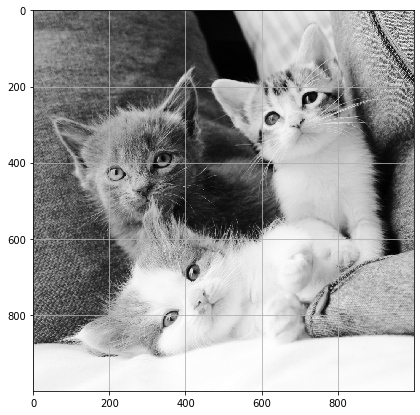

In [7]:
fig = plt.figure(figsize=(7,7))
plt.grid(True)
plt.imshow(image,cmap=plt.cm.gray)

## Making tiles shapes, shuffling the image and putting it all together

In [8]:
image_shape = (200,200)
image_blocks_original = view_as_blocks(image,block_shape=image_shape)

image_blocks = image_blocks_original
image_blocks = image_blocks.reshape((-1,) + image_shape)

np.random.shuffle(image_blocks)
image_montage = montage2d(image_blocks)

## Showing the shuffle Image

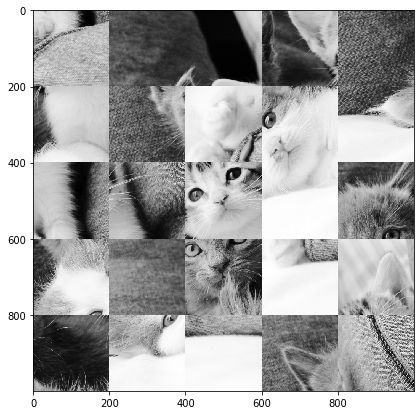

In [9]:
fig = plt.figure(figsize=(7,7))
plt.imshow(image_montage,cmap=plt.cm.gray)
#plt.imsave(f'image_blocks.jpg', image_montage,cmap=plt.cm.gray)

## Calculating the distance and orientation

In [10]:
n = image_blocks.shape[0]
me = np.zeros((n,n))
meO = np.zeros((n,n))
for i in np.arange(n):
    for j in np.arange(n):
        me[i,j], meO[i,j] = block_distance(image_blocks[i], image_blocks[j])

## Applying the genetic algorithm to solve the puzzle

In [15]:
n = np.sqrt(me.shape[0])
m = np.sqrt(me.shape[0])

individual(25)
target = 1.0
p_count = 1000
p = population(p_count, me.shape[0])
fitness_score_history = [category(p, target)]

iteration_img = []
for i in tqdm(range(60)):
    p = evolution(p, target,retain=0.2,random_select=0.05,mutate=0.05)
    
    fitness_score_iter = category(p, target)
    fitness_score_history.append(fitness_score_iter)
    
    opt_index = idx = np.argmin([fitness_score(pi, 0) for pi in p])
    iter_attempt = montage2d(image_blocks[p[opt_index],:,:])
    
    iteration_img.append(iter_attempt)
    

    print(fitness_score_iter)

# Creating a New Directory
path = "generations"
if os.path.exists(path):
    shutil.rmtree(path, ignore_errors=True)
os.mkdir("generations")

for n in range(len(iteration_img)):
    plt.imsave(f"./generations/Generation_{n:01}.jpg", iteration_img[n], cmap = plt.cm.gray)
dict = {'fitness_score iteration score':fitness_score_history}
df = pd.DataFrame(dict)
df.to_csv('fitness_score.csv')

  2%|▏         | 1/60 [00:20<20:30, 20.86s/it]

0.8750275674974103


  3%|▎         | 2/60 [00:40<19:52, 20.56s/it]

0.8212081790428166


  5%|▌         | 3/60 [01:00<19:14, 20.25s/it]

0.8084613359532568


  7%|▋         | 4/60 [01:20<18:53, 20.23s/it]

0.805192379654655


  8%|▊         | 5/60 [01:41<18:49, 20.54s/it]

0.8050904113690186


 10%|█         | 6/60 [02:01<18:24, 20.45s/it]

0.8009609791907784


 12%|█▏        | 7/60 [02:23<18:14, 20.65s/it]

0.7989230760238649


 13%|█▎        | 8/60 [02:44<18:09, 20.95s/it]

0.7971026524074644


 15%|█▌        | 9/60 [03:06<17:54, 21.08s/it]

0.7905447747648267


 17%|█▋        | 10/60 [03:27<17:37, 21.14s/it]

0.7962013433816895


 18%|█▊        | 11/60 [03:48<17:18, 21.20s/it]

0.7916682227191061


 20%|██        | 12/60 [04:11<17:14, 21.56s/it]

0.7927294777429941


 22%|██▏       | 13/60 [04:32<16:50, 21.49s/it]

0.7866050656203688


 23%|██▎       | 14/60 [04:53<16:24, 21.40s/it]

0.7838628273136912


 25%|██▌       | 15/60 [05:14<15:52, 21.16s/it]

0.7795732734974553


 27%|██▋       | 16/60 [05:33<15:06, 20.59s/it]

0.7752135676594494


 28%|██▊       | 17/60 [05:52<14:21, 20.02s/it]

0.7643159631499017


 30%|███       | 18/60 [06:09<13:31, 19.32s/it]

0.7535860151129339


 32%|███▏      | 19/60 [06:25<12:27, 18.24s/it]

0.7049058397294059


 33%|███▎      | 20/60 [06:37<10:53, 16.34s/it]

0.62595632793439


 35%|███▌      | 21/60 [06:45<09:04, 13.96s/it]

0.5476998887571418


 37%|███▋      | 22/60 [06:51<07:11, 11.37s/it]

0.48450434324407504


 38%|███▊      | 23/60 [06:54<05:33,  9.00s/it]

0.4370344205492801


 40%|████      | 24/60 [06:57<04:16,  7.14s/it]

0.4041296199608818


 42%|████▏     | 25/60 [06:58<03:08,  5.39s/it]

0.36405564988668676


 43%|████▎     | 26/60 [06:59<02:14,  3.96s/it]

0.35362221680681205


 45%|████▌     | 27/60 [06:59<01:36,  2.91s/it]

0.3527379380215845


 47%|████▋     | 28/60 [07:00<01:08,  2.15s/it]

0.35122899623426684


 48%|████▊     | 29/60 [07:00<00:50,  1.62s/it]

0.3508550291957691


 50%|█████     | 30/60 [07:00<00:37,  1.24s/it]

0.3508550291957691


 52%|█████▏    | 31/60 [07:01<00:28,  1.02it/s]

0.3508550291957691


 53%|█████▎    | 32/60 [07:01<00:22,  1.25it/s]

0.3508550291957691


 55%|█████▌    | 33/60 [07:02<00:18,  1.49it/s]

0.3508550291957691


 57%|█████▋    | 34/60 [07:02<00:15,  1.73it/s]

0.3508550291957691


 58%|█████▊    | 35/60 [07:02<00:12,  1.93it/s]

0.3508550291957691


 60%|██████    | 36/60 [07:03<00:11,  2.13it/s]

0.3508550291957691


 62%|██████▏   | 37/60 [07:03<00:10,  2.29it/s]

0.3508550291957691


 63%|██████▎   | 38/60 [07:03<00:09,  2.41it/s]

0.3508550291957691


 65%|██████▌   | 39/60 [07:04<00:08,  2.52it/s]

0.3508550291957691


 67%|██████▋   | 40/60 [07:04<00:07,  2.58it/s]

0.3508550291957691


 68%|██████▊   | 41/60 [07:05<00:07,  2.64it/s]

0.3508550291957691


 70%|███████   | 42/60 [07:05<00:06,  2.66it/s]

0.3508550291957691


 72%|███████▏  | 43/60 [07:05<00:06,  2.66it/s]

0.3508550291957691


 73%|███████▎  | 44/60 [07:06<00:05,  2.68it/s]

0.3508550291957691


 75%|███████▌  | 45/60 [07:06<00:05,  2.69it/s]

0.3508550291957691


 77%|███████▋  | 46/60 [07:06<00:05,  2.67it/s]

0.3508550291957691


 78%|███████▊  | 47/60 [07:07<00:04,  2.70it/s]

0.3508550291957691


 80%|████████  | 48/60 [07:07<00:04,  2.69it/s]

0.3508550291957691


 82%|████████▏ | 49/60 [07:07<00:04,  2.72it/s]

0.3508550291957691


 83%|████████▎ | 50/60 [07:08<00:03,  2.71it/s]

0.3508550291957691


 85%|████████▌ | 51/60 [07:08<00:03,  2.72it/s]

0.3508550291957691


 87%|████████▋ | 52/60 [07:09<00:02,  2.71it/s]

0.3508550291957691


 88%|████████▊ | 53/60 [07:09<00:02,  2.72it/s]

0.3508550291957691


 90%|█████████ | 54/60 [07:09<00:02,  2.73it/s]

0.3508550291957691


 92%|█████████▏| 55/60 [07:10<00:01,  2.70it/s]

0.3508550291957691


 93%|█████████▎| 56/60 [07:10<00:01,  2.72it/s]

0.3508550291957691


 95%|█████████▌| 57/60 [07:10<00:01,  2.71it/s]

0.3508550291957691


 97%|█████████▋| 58/60 [07:11<00:00,  2.73it/s]

0.3508550291957691


 98%|█████████▊| 59/60 [07:11<00:00,  2.73it/s]

0.3508550291957691


100%|██████████| 60/60 [07:12<00:00,  7.20s/it]

0.3508550291957691


## Showing the Output Image

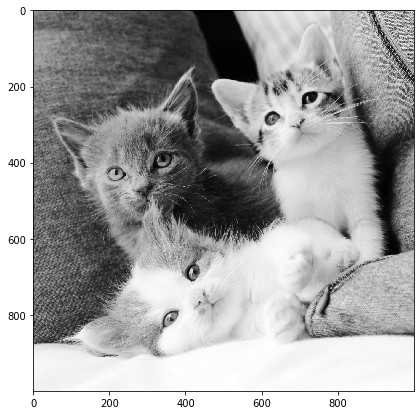

In [12]:
idx = np.argmin([fitness_score(pi, 0) for pi in p])
attempt = montage2d(image_blocks[p[idx], :,:])

fig = plt.figure(figsize=(7,7))
plt.imshow(attempt,cmap=plt.cm.gray)

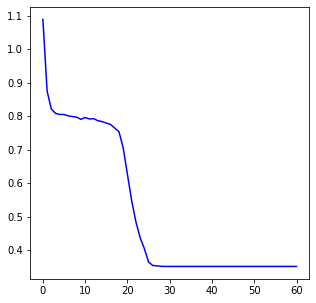

In [17]:
fig = plt.figure(figsize=(5,5))
plt.plot(fitness_score_history, color='blue')
plt.savefig("fitness_score_plot.jpg")